In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

rating_header = ["user_id", "item_id", "rating", "timestamp"]
user_header = ["user_id", "age", "gender", "occupation", "zip_code"]
movie_header = ["item_id", "title", "release_date", "video_release_date", "IMDb_URL",
         "unknown", "Action", "Adventure", "Animation","Children's", "Comedy", "Crime",
         "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", 
         "Romance", "Sci-Fi", "Thriller", "War", "Western"]

rating = pd.read_csv("u.data", sep = '\t', header = None, names=rating_header)
genre = pd.read_csv("u.genre", sep = '|', header = None)
user = pd.read_csv("u.user", sep = '|', header = None, names=user_header)
occupation = pd.read_csv("u.occupation", header = None)
item = pd.read_csv("u.item", sep = '|', header = None, encoding = 'latin1', names = movie_header)
info = pd.read_csv("u.info", sep = ' ', header = None, names=["count", "name"])

In [41]:
rating

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [49]:
rating.groupby('item_id')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
item_id,,,,,,,,
1,452.0,3.878319,0.927897,1.0,3.0,4.0,5.0,5.0
2,131.0,3.206107,0.966497,1.0,3.0,3.0,4.0,5.0
3,90.0,3.033333,1.212760,1.0,2.0,3.0,4.0,5.0
4,209.0,3.550239,0.965069,1.0,3.0,4.0,4.0,5.0
5,86.0,3.302326,0.946446,1.0,3.0,3.0,4.0,5.0
...,...,...,...,...,...,...,...,...
1678,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0
1679,1.0,3.000000,NaN,3.0,3.0,3.0,3.0,3.0
1680,1.0,2.000000,NaN,2.0,2.0,2.0,2.0,2.0


In [96]:
genre[0]

0         unknown
1          Action
2       Adventure
3       Animation
4      Children's
5          Comedy
6           Crime
7     Documentary
8           Drama
9         Fantasy
10      Film-Noir
11         Horror
12        Musical
13        Mystery
14        Romance
15         Sci-Fi
16       Thriller
17            War
18        Western
Name: 0, dtype: object

In [43]:
user

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

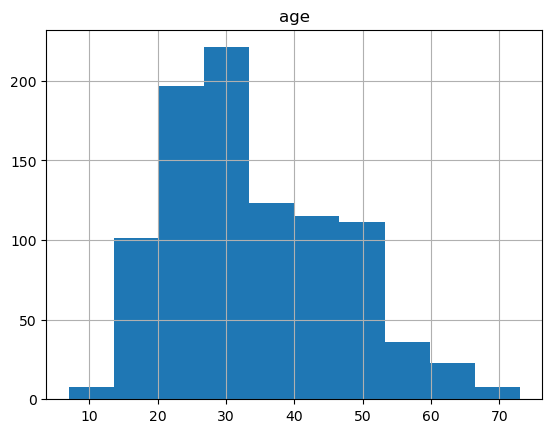

In [133]:
user.hist(column="age")

In [48]:
item

,item_id,title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
info

,count,name
0,943,users
1,1682,items
2,100000,ratings


<AxesSubplot:xlabel='title', ylabel='count'>

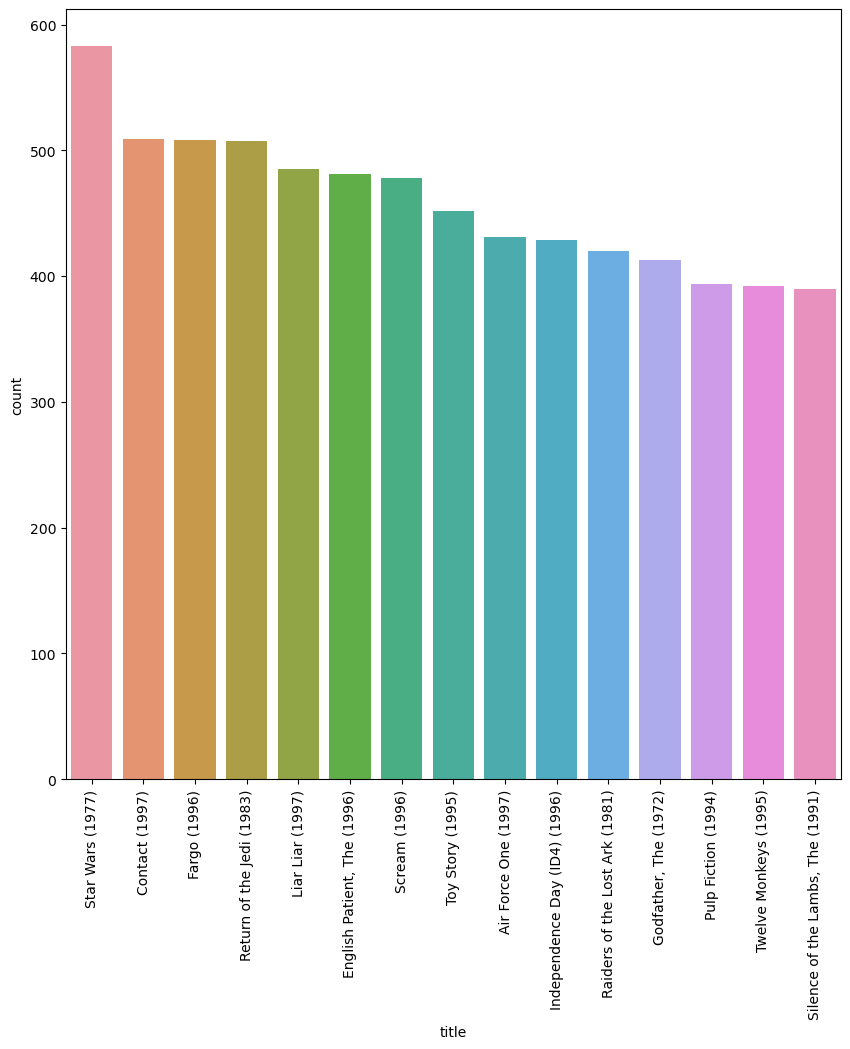

In [121]:
item_title = item.loc[:, 'item_id' : 'title']

rating_count = rating.groupby('item_id')['rating'].describe()['count']
rating_mean = rating.groupby('item_id')['rating'].describe()['mean']
df_stat = pd.concat([rating_count, rating_mean], axis=1)
df_stat = pd.merge(item_title, df_stat, on='item_id')
top_rate = df_stat.sort_values('count', ascending = False).head(15)
top_rate.reset_index()
plt.figure(figsize = (10,10))
plt.xticks(rotation = 90)
sns.barplot(data = top_rate, x = 'title',y = 'count')

In [126]:
user_rating = rating.loc[:, 'user_id' : 'rating']
user_matrix = pd.merge(user_rating, item_title, on='item_id')
userid_matrix = user_matrix.pivot_table(index = 'title', columns = 'user_id', values = 'rating')
userid_matrix.fillna(0)

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1-900 (1994),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians (1996),2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0
12 Angry Men (1957),5.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
187 (1997),0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Young Guns II (1990),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
"Young Poisoner's Handbook, The (1995)",0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zeus and Roxanne (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [127]:
all_corr = userid_matrix.corr(method = 'pearson', min_periods = 80)
all_corr

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,NaN,NaN,NaN,0.420809,0.29541,0.258137,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.067549
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.420809,NaN,NaN,NaN,1.000000,NaN,0.175630,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


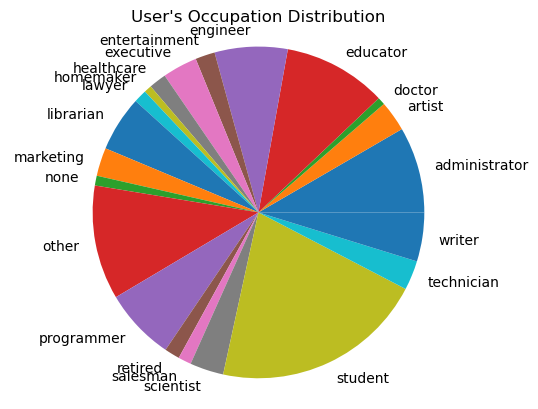

In [151]:
occupation_count = user[["user_id", "occupation"]].groupby("occupation", as_index=False).size()
plt.pie(occupation_count["size"], labels=occupation_count["occupation"])
plt.title("User's Occupation Distribution")
plt.axis("equal")
plt.show()

In [162]:
genre_count = item.loc[:, 'unknown' : 'Western'].sum(axis=0)
print(genre_count)
# plt.pie(genre_count["size"], labels=genre_count.index)
# plt.title("Genre Distribution")
# plt.axis("equal")
# plt.show()

unknown          2
Action         251
Adventure      135
Animation       42
Children's     122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64
